Medical insurance is dependent on many factors such as age sex bmi region and mainly weather a person smokes or not. The region in which a person lives also has impact on premium prices.

In [2]:
from google.colab import files
import io
data1=files.upload()

Saving insurance.csv to insurance.csv


In [3]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(data1['insurance.csv'].decode('utf-8')))
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In our data we have 1338 Rows and 7 columns

In [4]:
# Now we got our dataframe ready and now let us do some Exploratory Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline to enable the inline plotting, where the plots/graphs will be displayed 
#just below the cell where your plotting commands are written.
#warnings is used to ignore unnecessary warnings

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Most of outlies and missing values can be observed in describe() function.

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#To find missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we dont have any missing values in our data set

Text(0.5, 1.0, 'distribution of charges')

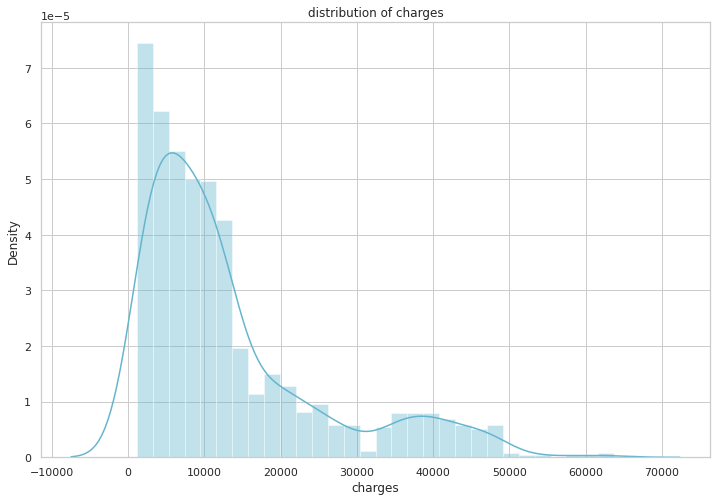

In [8]:
#Lets see how charges are distributed
sns.set(style='whitegrid')
f, ax= plt.subplots(1,1,figsize=(12,8))
ax=sns.distplot(data['charges'],kde=True, color='c')
plt.title('distribution of charges')




From the graph we can see that is Right skewed and we can convert it to normal distribution using log or boxcox transformation


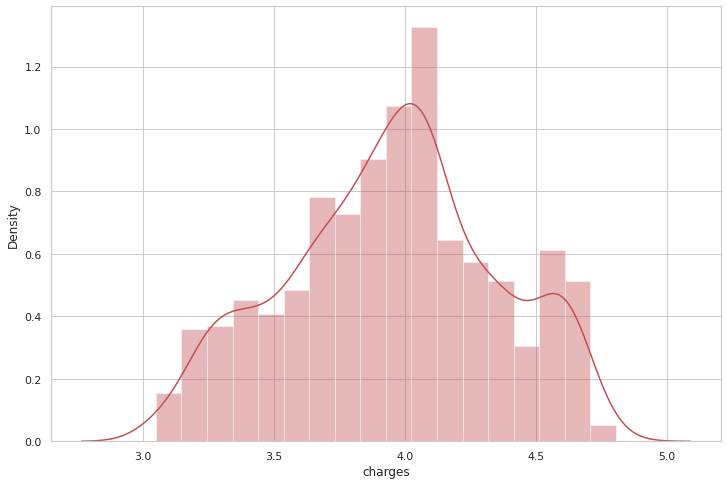

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax=sns.distplot(np.log10(data['charges']),kde=True, color='r')

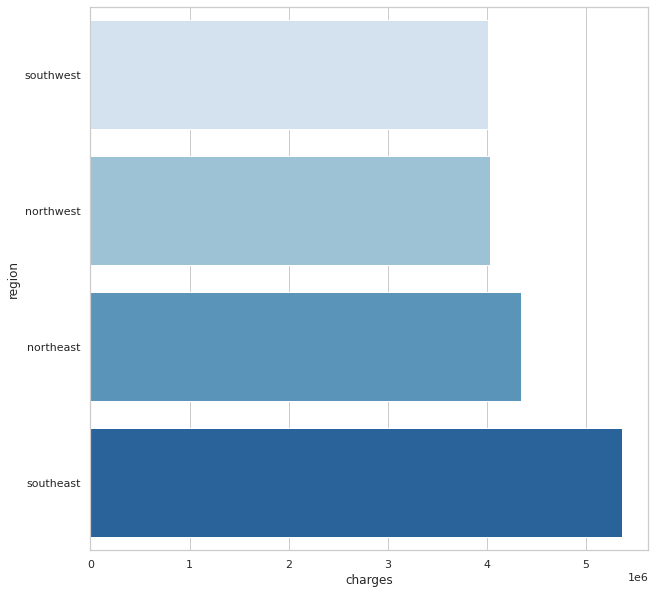

In [10]:
#visualizing charges by region
charges=data['charges'].groupby(data.region).sum().sort_values(ascending=True)
f, ax =plt.subplots(1,1,figsize=(10,10))
ax=sns.barplot(charges.head(),charges.head().index,palette='Blues')


we can conclude that highest charges are from Southeast and lowest from southwest

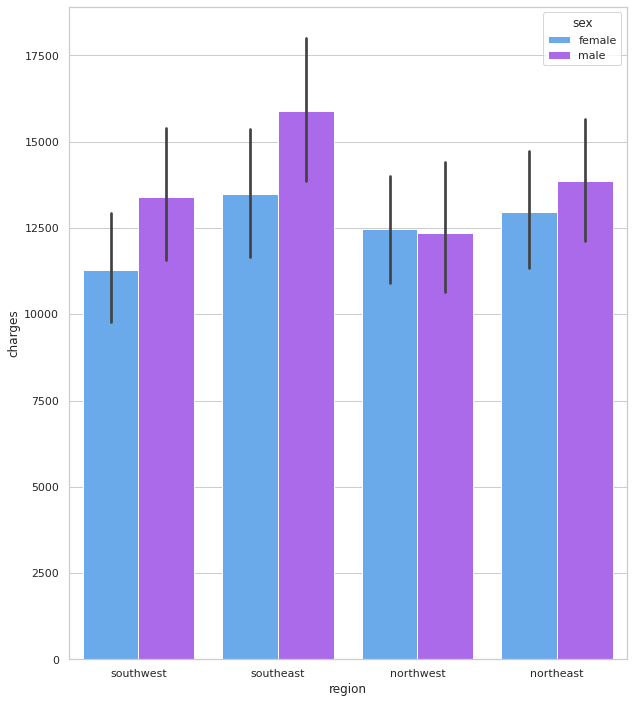

In [11]:
#lets compare charges with region and sex
f, ax = plt.subplots(1, 1, figsize=(10, 12))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='cool')


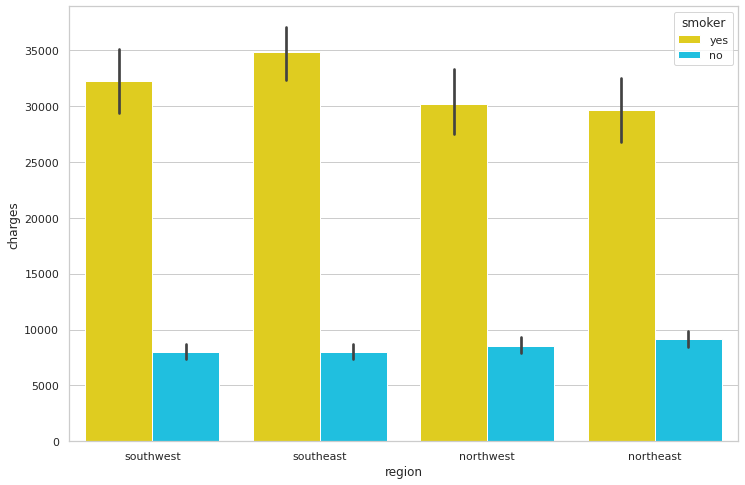

In [12]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=data, palette='jet_r')

From This graph we can conclude that most of the smokers are charged heavily and most of smokers live in south east region and lowest rates are in northeast.


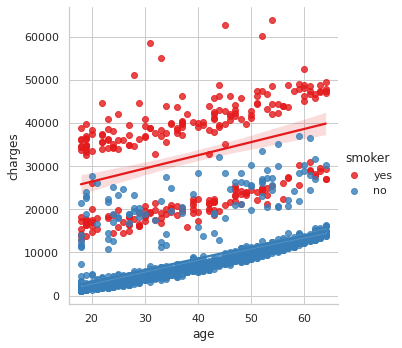

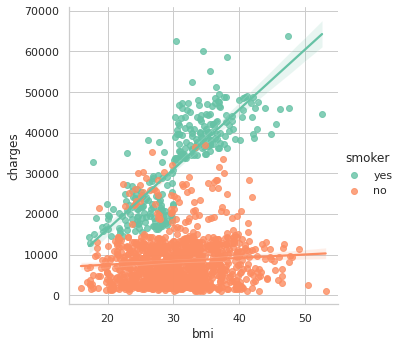

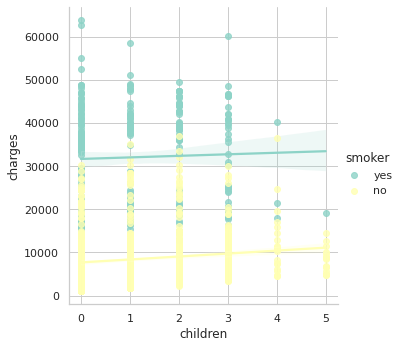

In [13]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set3')

Above 3 graphs gives a clear picture of how the charges varies with respect to Age, BMI and Childers depending upon weathe a person smokes or not

In [14]:
# we have 3 object variables and we need to convert them into categorical
data[['sex','smoker','region']]=data[['sex','smoker','region']].astype('category')


In [15]:
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [16]:
#converting categorical into numerical using Labelencoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex=label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker=label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region=label.transform(data.region)
data.dtypes


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

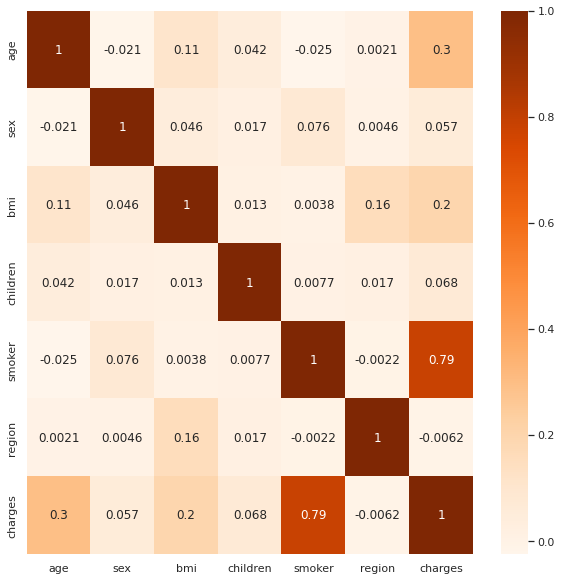

In [17]:
f, ax= plt.subplots(1,1,figsize=(10,10))
ax=sns.heatmap(data.corr(), annot=True, cmap='Oranges')

From above heat map we can conclude that smokers and charges are highly correlated

Lets go into Machine Learning models

In [18]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x=data.drop(['charges'],axis=1)
y=data['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=19)
linreg=LinearRegression()
linreg.fit(x_train,y_train)
print("Intercept is",linreg.intercept_)
print("co-eff of equation",linreg.coef_)
print("Scores=", linreg.score(x_test,y_test) )


Intercept is -10931.496106072087
co-eff of equation [ 2.57130635e+02  6.52202667e+00  2.94127538e+02  5.69046182e+02
  2.40657570e+04 -2.83127655e+02]
Scores= 0.7455822176310463


In [19]:
#Ridge Regression
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=0.5)
Ridge.fit(x_train,y_train)
print("Intercept is",Ridge.intercept_)
print("co-eff of equation",Ridge.coef_)
print("Scores=", Ridge.score(x_test,y_test) )



Intercept is -10916.133093848171
co-eff of equation [ 2.57079912e+02  1.07122914e+01  2.94076869e+02  5.68764492e+02
  2.39939668e+04 -2.82832689e+02]
Scores= 0.7457491604184981


In [20]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-10930.685528671695
[ 2.57128910e+02  5.80714397e+00  2.94118421e+02  5.68918279e+02
  2.40645446e+04 -2.82949731e+02]
0.745586560961701


In [21]:
#Random forest Regressor
from sklearn.ensemble import RandomForestRegressor 
x=data.drop(['charges'],axis=1)
y=data['charges']
Randfor=RandomForestRegressor(n_estimators=100, criterion='mse',random_state=99,n_jobs=-1)
Randfor.fit(x_train,y_train)
x_train_pred=Randfor.predict(x_train)
x_test_pred=Randfor.predict(x_test)
print('MSE train data: %.3f,\n MSE test data: %.3f' %
      (metrics.mean_squared_error(x_train_pred,y_train),
       metrics.mean_squared_error(x_train_pred,y_train)))

print('R2 train data: %.3f,\n R2 test data: %.3f' %
      (metrics.r2_score(x_train_pred,y_train),
       metrics.r2_score(x_train_pred,y_train)))


MSE train data: 3577809.888,
 MSE test data: 3577809.888
R2 train data: 0.973,
 R2 test data: 0.973


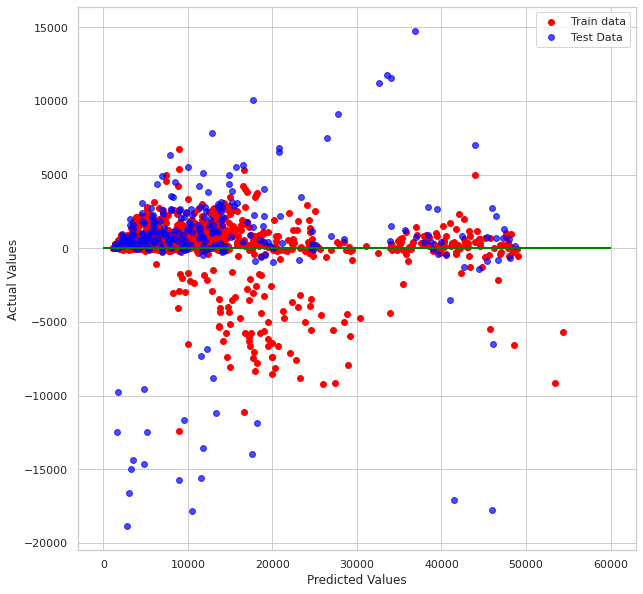

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(x_train_pred,x_train_pred-y_train,c='red',marker='o', s=35, alpha=1, label='Train data')
plt.scatter(x_test_pred,x_test_pred-y_test, c='blue',marker='o',s=35, alpha=0.7,label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc='upper right')
plt.hlines(y=0,xmin=0,xmax=60000,lw=2,color='green')


In [ ]:
#Feature Selection


In [47]:
from sklearn.preprocessing import PolynomialFeatures
x=data.drop(['charges','sex','region'],axis=1)
y=data.charges
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly, y, test_size=0.2, random_state=99 )
poly_reg=LinearRegression()
poly_reg.fit(x_train,y_train)
y_train_pred=poly_reg.predict(x_train)
y_test_pred=poly_reg.predict(x_test)
print(poly_reg.intercept_)
print(poly_reg.coef_)
print(poly_reg.score(x_test,y_test))




-3969.128083515443
[ 0.00000000e+00 -7.73662944e+01  4.71781352e+02  9.84983639e+02
 -1.08850545e+04  4.00356691e+00  1.04740102e+00  6.14356229e-01
 -1.26753945e+00 -8.52960953e+00  5.23598987e+00  1.49967660e+03
 -1.07229188e+02 -4.67277255e+02 -1.08850545e+04]
0.8233950777622888


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3054.295679936782
Mean Squared Error: 24845355.594921205
Root Mean Squared Error: 4984.511570346808


In [49]:
#Predicting Test Data
y_test_predict=poly_reg.predict(x_test)
df=pd.DataFrame({'Actual':y_test, 'predicted': y_test_pred})
df

,Actual,predicted
156,21223.67580,23994.765267
123,39556.49450,34020.336614
1269,8615.30000,10981.035885
512,9361.32680,9985.962815
377,38126.24650,41092.995465
...,...,...
101,3645.08940,4595.659588
939,9487.64420,11308.262120
22,1137.01100,2747.757889
801,14313.84630,15823.257663
